# Prerequisites

In [2]:
import pandas as pd

In [17]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Ingestion

Note: this data has already been standardized and encoded. Refer PrepExams.ipynb

In [4]:
df = pd.read_csv('data/exams-treated.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         100 non-null    int64  
 1   parental level of education        100 non-null    int64  
 2   math score                         100 non-null    float64
 3   reading score                      100 non-null    float64
 4   writing score                      100 non-null    float64
 5   gender_female                      100 non-null    int64  
 6   gender_male                        100 non-null    int64  
 7   race/ethnicity_group A             100 non-null    int64  
 8   race/ethnicity_group B             100 non-null    int64  
 9   race/ethnicity_group C             100 non-null    int64  
 10  race/ethnicity_group D             100 non-null    int64  
 11  race/ethnicity_group E             100 non-null    int64  


# Train Test split

In [6]:
X = df.drop('math score', axis=1)
print(X.shape)
y = df['math score']
print(y.shape)

(100, 15)
(100,)


In [7]:
xTrain, xTest, yTrain, yTest = train_test_split(X,y, test_size=0.2)
print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)

(80, 15) (20, 15) (80,) (20,)


# Training

In [8]:
# fit_intercept must be False when using dummy/one-hot encoded variables 
# to avoid the dummy variable trap
model = LinearRegression(fit_intercept=False).fit(xTrain, yTrain)

In [9]:
# evaluating how the model performs on the training set
# R2 score measure how well the model captures variation in the training data
model.score(xTrain, yTrain)

0.8931377548639576

## Prediction

In [10]:
# predicting mpg using the model fit with horsepower
yPred = model.predict(xTest)
yPred.shape

(20,)

## Inspecting the model

In [11]:
# coefficients of the linear model
pd.Series(model.coef_, xTrain.columns).sort_values()

gender_female                       -0.400899
race/ethnicity_group A              -0.218380
lunch_free/reduced                  -0.205118
race/ethnicity_group C              -0.172702
test preparation course_completed   -0.124173
race/ethnicity_group D              -0.096640
parental level of education         -0.005577
Unnamed: 0                           0.000566
reading score                        0.037372
race/ethnicity_group B               0.058242
test preparation course_none         0.084807
lunch_standard                       0.165752
gender_male                          0.361533
race/ethnicity_group E               0.390115
writing score                        0.825701
dtype: float64

writing score has the most predictive power

In [12]:
# evaluating how the model performs on the test set
# R2 score measure how well the model captures variation in the test data
r2_score(yTest, yPred)

0.853197124471535

In [13]:
dfCompare = pd.DataFrame({
    'prediction': yPred,
    'actual': yTest
})
dfCompare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 45 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   prediction  20 non-null     float64
 1   actual      20 non-null     float64
dtypes: float64(2)
memory usage: 480.0 bytes


In [ ]:
# predictions look close to the actuals
dfCompare.sample(5)

,prediction,actual
42,-0.691138,-0.497009
77,0.217989,0.145952
25,-2.090387,-2.425892
2,0.934163,0.531729
48,1.455713,1.817651


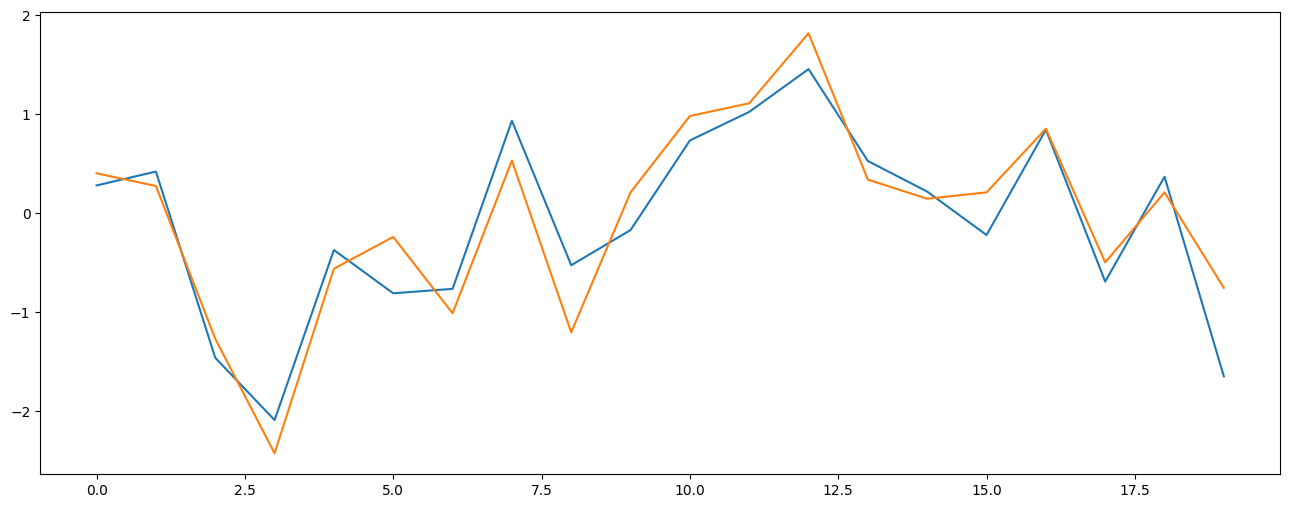

In [21]:
plt.figure(figsize=(16,6))
plt.plot(dfCompare.prediction.values, label='prediction')
plt.plot(dfCompare.actual.values, label='actual')
